# Summary of Model Results

In this notebook, we compile and summarize the results from five machine learning models trained to predict rogue wave behavior: Elastic Net, Random Forest, XGBoost, Feed-Forward Neural Network (FFNN), and Support Vector Machine (SVM). Each model was trained using the same preprocessed dataset and evaluated using a consistent set of performance metrics to ensure fair comparison.

The models differ in their underlying assumptions and mechanisms:
- Elastic Net is a linear regression model that combines L1 and L2 regularization. It is interpretable and suitable for datasets with multicollinearity, but limited in capturing non-linear patterns.
- Random Forest is an ensemble of decision trees that aggregates predictions to reduce overfitting. It handles non-linear relationships and interactions well, and is relatively robust with minimal parameter tuning.
- XGBoost (Extreme Gradient Boosting) is a more advanced tree-based model that builds trees sequentially to correct errors from previous iterations. It often achieves superior performance, especially on complex datasets, but requires careful hyperparameter tuning.
- Feed-Forward Neural Network (FFNN) is a deep learning model capable of learning complex non-linear relationships. While powerful, it is also more sensitive to overfitting and computationally expensive to train.
- Support Vector Machine (SVM) uses kernel functions to find optimal decision boundaries in high-dimensional feature space. It is particularly effective on smaller datasets with clear margins, but might scale poorly with large data.

By comparing their predictive performance and interpretability, we want to understand which modeling approach is most suitable for this task and what insights can be gained about rogue wave formation from the learned models.

**Imports**

In [1]:
import os
import sys
import zipfile
import requests
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import shap

sys.path.append('./')
sys.path.append('../scripts/')
import utils

**Loading Models Performances**

In [2]:
dir_output = "../results/"
os.makedirs(dir_output, exist_ok=True)

Linear Model

In [3]:
# download zip file from link below. Automatic download only works once repo ist publicly available
# url = "https://github.com/HelmholtzAI-Consultants-Munich/rogue_wave_prediction/releases/download/v1.0.0/linear_regression.zip"
# with open(f"{dir_output}/linear_regression.zip", "wb") as f:
#     f.write(requests.get(url).content)

# with zipfile.ZipFile(f"{dir_output}/linear_regression.zip", 'r') as zip_ref:
#     zip_ref.extractall(dir_output)

In [4]:
model, X_train, y_train, y_train_cat, X_test, y_test, y_test_cat = utils.load_data_and_model("../results/linear_regression/model_and_data.pickle", output=False)
lm_y_true_train, lm_y_pred_train, lm_mse_train, lm_mae_train, lm_r2_train, lm_spearman_r_train = utils.evaluate_best_regressor(model, X_train, y_train, dataset="Train", plot=False)
lm_y_true_test, lm_y_pred_test, lm_mse_test, lm_mae_test, lm_r2_test, lm_spearman_r_test = utils.evaluate_best_regressor(model, X_test, y_test, dataset="Test", plot=False)

/opt/anaconda3/envs/rw/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/rw/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


Support Vector Machine Model

In [5]:
# download zip file from link below. Automatic download only works once repo ist publicly available
# url = "https://github.com/HelmholtzAI-Consultants-Munich/rogue_wave_prediction/releases/download/v1.0.0/svm.zip"
# with open(f"{dir_output}/svm.zip", "wb") as f:
#     f.write(requests.get(url).content)

# with zipfile.ZipFile(f"{dir_output}/svm.zip", 'r') as zip_ref:
#     zip_ref.extractall(dir_output)

In [6]:
# Load and unpack the train and test predictions
with open("../results/svm/performance_train.pickle", "rb") as handle:
    performance_train = pickle.load(handle)

svm_y_true_train, svm_y_pred_train, svm_mse_train, svm_mae_train, svm_r2_train, svm_spearman_r_train = performance_train

with open("../results/svm/performance_test.pickle", "rb") as handle:
    performance_test = pickle.load(handle)

svm_y_true_test, svm_y_pred_test, svm_mse_test, svm_mae_test, svm_r2_test, svm_spearman_r_test = performance_test

Random Forest Model

In [7]:
# download zip file from link below. Automatic download only works once repo ist publicly available
# url = "https://github.com/HelmholtzAI-Consultants-Munich/rogue_wave_prediction/releases/download/v1.0.0/random_forest.zip"
# with open(f"{dir_output}/random_forest.zip", "wb") as f:
#     f.write(requests.get(url).content)

# with zipfile.ZipFile(f"{dir_output}/random_forest.zip", 'r') as zip_ref:
#     zip_ref.extractall(dir_output)

In [8]:
model, X_train, y_train, y_train_cat, X_test, y_test, y_test_cat = utils.load_data_and_model("../results/random_forest/model_and_data.pickle", output=False)
rf_y_true_train, rf_y_pred_train, rf_mse_train, rf_mae_train, rf_r2_train, rf_spearman_r_train = utils.evaluate_best_regressor(model, X_train, y_train, dataset="Train", plot=False)
rf_y_true_test, rf_y_pred_test, rf_mse_test, rf_mae_test, rf_r2_test, rf_spearman_r_test = utils.evaluate_best_regressor(model, X_test, y_test, dataset="Test", plot=False)

Loaded the following model: RandomForestRegressor(criterion='friedman_mse', max_depth=30,
                      max_features='sqrt', max_samples=0.5, random_state=42) with an average tree depth of : 30.0


XG Boost Model

In [9]:
# download zip file from link below. Automatic download only works once repo ist publicly available
# url = "https://github.com/HelmholtzAI-Consultants-Munich/rogue_wave_prediction/releases/download/v1.0.0/xg_boost.zip"
# with open(f"{dir_output}/xg_boost.zip", "wb") as f:
#     f.write(requests.get(url).content)

# with zipfile.ZipFile(f"{dir_output}/xg_boost.zip", 'r') as zip_ref:
#     zip_ref.extractall(dir_output)

In [10]:
model, X_train, y_train, y_train_cat, X_test, y_test, y_test_cat = utils.load_data_and_model("../results/xg_boost/model_and_data.pickle", output=False)
xgb_y_true_train, xgb_y_pred_train, xgb_mse_train, xgb_mae_train, xgb_r2_train, xgb_spearman_r_train = utils.evaluate_best_regressor(model, X_train, y_train, dataset="Train", plot=False)
xgb_y_true_test, xgb_y_pred_test, xgb_mse_test, xgb_mae_test, xgb_r2_test, xgb_spearman_r_test = utils.evaluate_best_regressor(model, X_test, y_test, dataset="Test", plot=False)

Feed Foreward Neural Network Model

In [11]:
# download zip file from link below. Automatic download only works once repo ist publicly available
# url = "https://github.com/HelmholtzAI-Consultants-Munich/rogue_wave_prediction/releases/download/v1.0.0/ffnn.zip"
# with open(f"{dir_output}/ffnn.zip", "wb") as f:
#     f.write(requests.get(url).content)

# with zipfile.ZipFile(f"{dir_output}/ffnn.zip", 'r') as zip_ref:
#     zip_ref.extractall(dir_output)

In [12]:
model, X_train, y_train, y_train_cat, X_test, y_test, y_test_cat = utils.load_data_and_model("../results/ffnn/model_and_data.pickle", output=False)
ffnn_y_true_train, ffnn_y_pred_train, ffnn_mse_train, ffnn_mae_train, ffnn_r2_train, ffnn_spearman_r_train = utils.evaluate_best_regressor(model, X_train, y_train, dataset="Train", plot=False)
ffnn_y_true_test, ffnn_y_pred_test, ffnn_mse_test, ffnn_mae_test, ffnn_r2_test, ffnn_spearman_r_test = utils.evaluate_best_regressor(model, X_test, y_test, dataset="Test", plot=False)

  291/26210 ━━━━━━━━━━━━━━━━━━━━ 13s 527us/step

2025-11-07 15:39:17.902906: I external/local_xla/xla/service/service.cc:163] XLA service 0x314210f10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-11-07 15:39:17.902918: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Host, Default Version
2025-11-07 15:39:17.907794: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762526357.937440 3112174 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26210/26210 ━━━━━━━━━━━━━━━━━━━━ 11s 417us/step
6553/6553 ━━━━━━━━━━━━━━━━━━━━ 3s 401us/step


**Assembling Model Performances**

In [13]:
train_scores = {
    'MSE': {'ElasticNet': lm_mse_train, 'SVM': svm_mse_train, 'Random Forest': rf_mse_train, 'XGBoost': xgb_mse_train, 'FFNN': ffnn_mse_train},
    'MAE': {'ElasticNet': lm_mae_train, 'SVM': svm_mae_train, 'Random Forest': rf_mae_train, 'XGBoost': xgb_mae_train, 'FFNN': ffnn_mae_train},
    'R2': {'ElasticNet': lm_r2_train, 'SVM': svm_r2_train, 'Random Forest': rf_r2_train, 'XGBoost': xgb_r2_train, 'FFNN': ffnn_r2_train},
    'SpearmanR': {'ElasticNet': lm_spearman_r_train, 'SVM': svm_spearman_r_train, 'Random Forest': rf_spearman_r_train, 'XGBoost': xgb_spearman_r_train, 'FFNN': ffnn_spearman_r_train}
}

test_scores = {
    'MSE': {'ElasticNet': lm_mse_test, 'SVM': svm_mse_test, 'Random Forest': rf_mse_test, 'XGBoost': xgb_mse_test, 'FFNN': ffnn_mse_test},
    'MAE': {'ElasticNet': lm_mae_test, 'SVM': svm_mae_test, 'Random Forest': rf_mae_test, 'XGBoost': xgb_mae_test, 'FFNN': ffnn_mae_test},
    'R2': {'ElasticNet': lm_r2_test, 'SVM': svm_r2_test, 'Random Forest': rf_r2_test, 'XGBoost': xgb_r2_test, 'FFNN': ffnn_r2_test},
    'SpearmanR': {'ElasticNet': lm_spearman_r_test, 'SVM': svm_spearman_r_test, 'Random Forest': rf_spearman_r_test, 'XGBoost': xgb_spearman_r_test, 'FFNN': ffnn_spearman_r_test}
}

In [14]:
# Define your inputs
models = ['ElasticNet', 'SVM', 'Random Forest', 'XGBoost', 'FFNN']
metrics = ['MSE', 'MAE', 'R2', 'SpearmanR']
datasets = {'Train': train_scores, 'Test': test_scores}

# Convert to long-form DataFrame
rows = []
for dataset_name, score_dict in datasets.items():
    for metric in metrics:
        for model in models:
            rows.append({
                'Model': model,
                'Dataset': dataset_name,
                'Metric': metric,
                'Performance': score_dict[metric][model]
            })

performances = pd.DataFrame(rows)

In [15]:
labels = {
    "ElasticNet": {
        "Train": (lm_y_true_train, lm_y_pred_train),
        "Test": (lm_y_true_test, lm_y_pred_test)
    },
    "SVM": {
        "Train": (svm_y_true_train, svm_y_pred_train),
        "Test": (svm_y_true_test, svm_y_pred_test)
    },
    "Random Forest": {
        "Train": (rf_y_true_train, rf_y_pred_train),
        "Test": (rf_y_true_test, rf_y_pred_test)
    },
    "XGBoost": {
        "Train": (xgb_y_true_train, xgb_y_pred_train),
        "Test": (xgb_y_true_test, xgb_y_pred_test)
    },
    "FFNN": {
        "Train": (ffnn_y_true_train, ffnn_y_pred_train),
        "Test": (ffnn_y_true_test, ffnn_y_pred_test)
    }
}

**Plotting Model Performances**

In [16]:
# Custom colors
custom_palette = {
    "Train": "#00adec",  
    "Test": "#ff6843"    
}

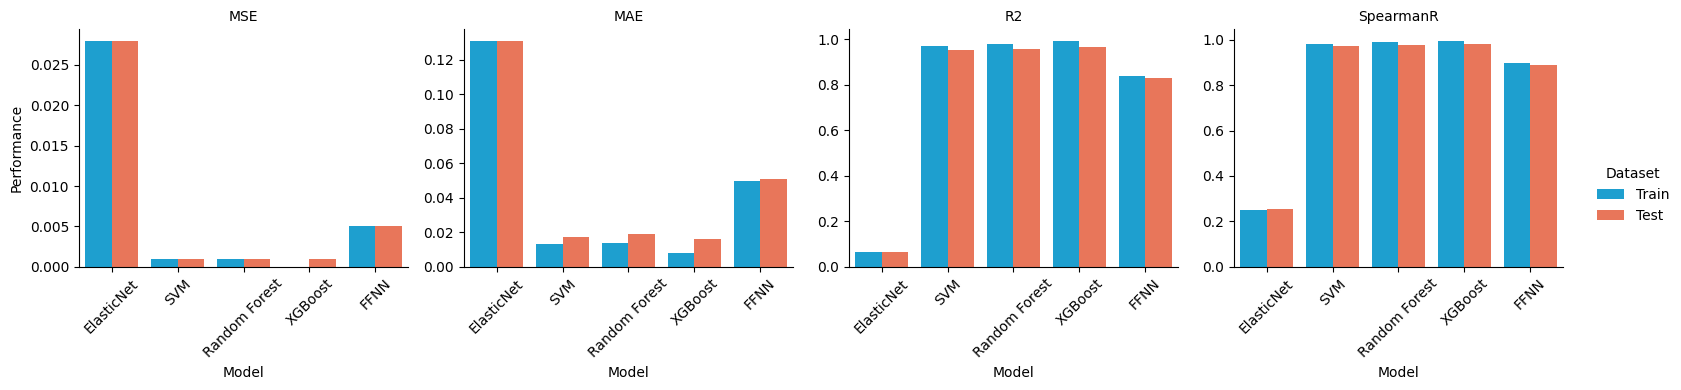

In [17]:
g = sns.catplot(
    data=performances,
    kind="bar",
    x="Model",
    y="Performance",
    hue="Dataset",
    col="Metric",
    palette=custom_palette,
    height=4,
    aspect=1,
    sharey=False,
)

g.set_titles("{col_name}")
g.set_axis_labels("Model", "Performance")
g.set_xticklabels(rotation=45)
g.tight_layout()
plt.show()

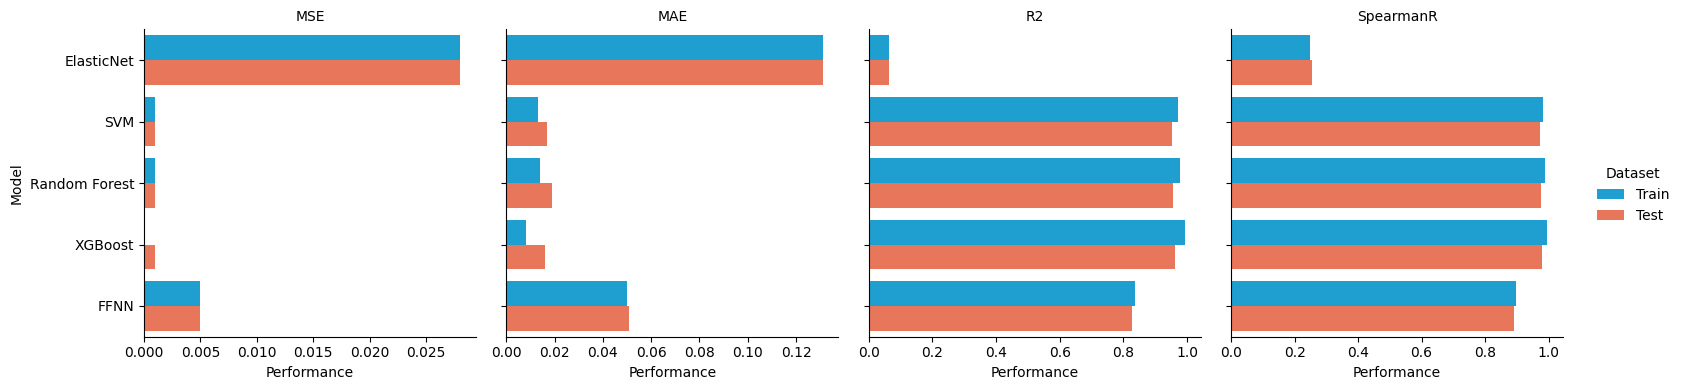

In [18]:
g = sns.catplot(
    data=performances,
    kind="bar",
    y="Model",
    x="Performance",
    hue="Dataset",
    col="Metric",
    palette=custom_palette,
    height=4,
    aspect=1,
    sharex=False,
)

g.set_titles("{col_name}")
g.set_axis_labels("Performance", "Model")
g.tight_layout()
plt.show()

/var/folders/8g/7wdchs993770j0nbzbt5p0_r0000gn/T/ipykernel_2406/3740878998.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  g = sns.catplot(


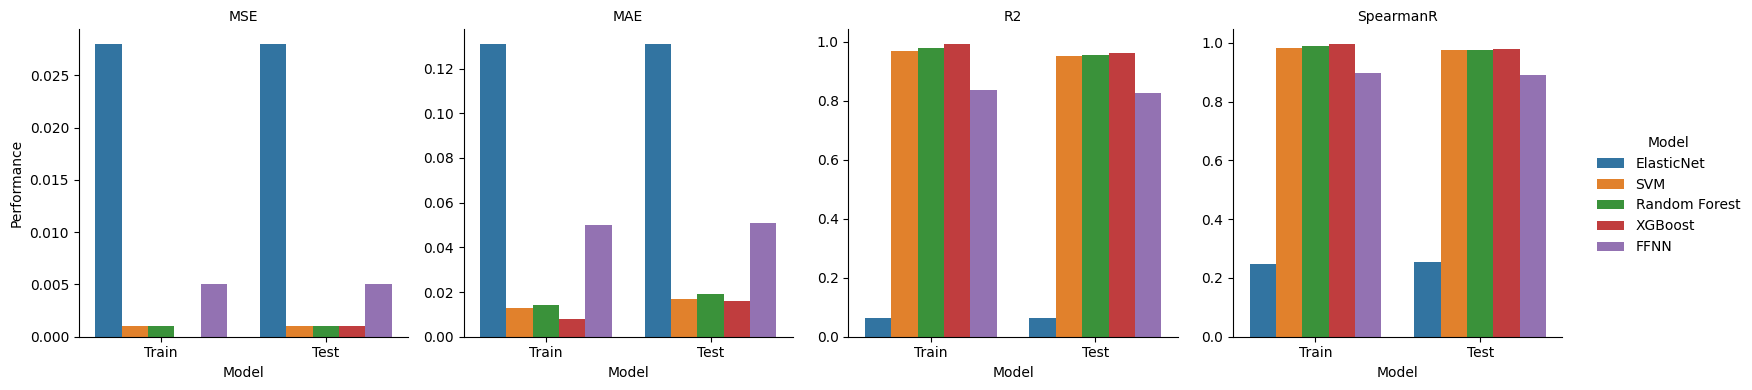

In [19]:
g = sns.catplot(
    data=performances,
    kind="bar",
    x="Dataset",
    y="Performance",
    hue="Model",
    col="Metric",
    palette=sns.color_palette(),
    height=4,
    aspect=1,
    sharey=False,
)

g.set_titles("{col_name}")
g.set_axis_labels("Model", "Performance")
#g.set_xticklabels(rotation=45)
g.tight_layout()
plt.show()

/var/folders/8g/7wdchs993770j0nbzbt5p0_r0000gn/T/ipykernel_2406/41721082.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  g = sns.catplot(


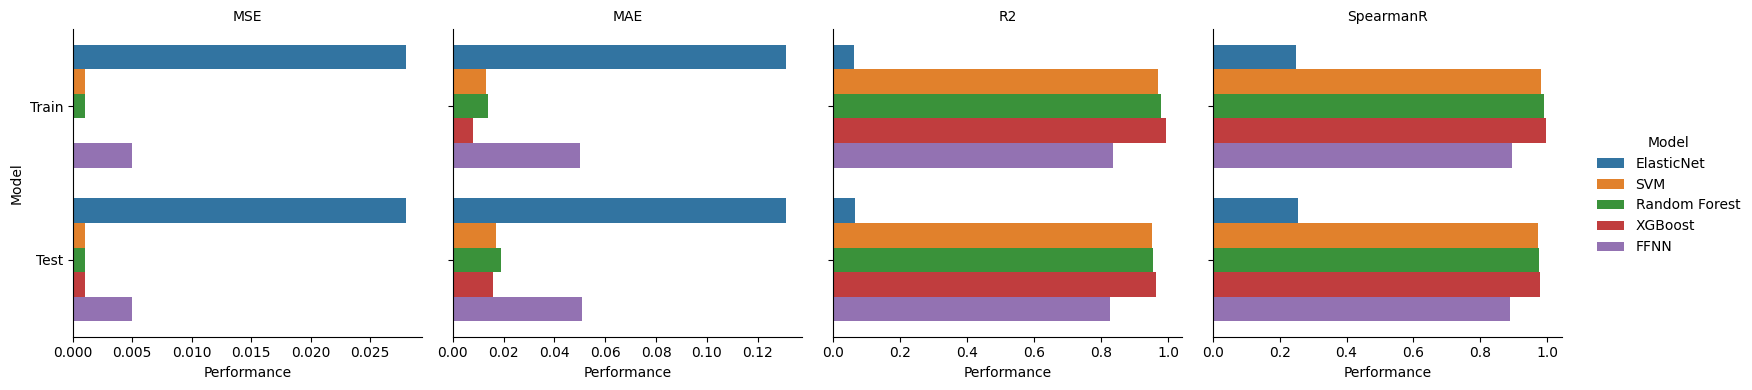

In [20]:
g = sns.catplot(
    data=performances,
    kind="bar",
    y="Dataset",
    x="Performance",
    hue="Model",
    col="Metric",
    palette=sns.color_palette(),
    height=4,
    aspect=1,
    sharex=False,
)

g.set_titles("{col_name}")
g.set_axis_labels("Performance", "Model")
g.tight_layout()
plt.show()

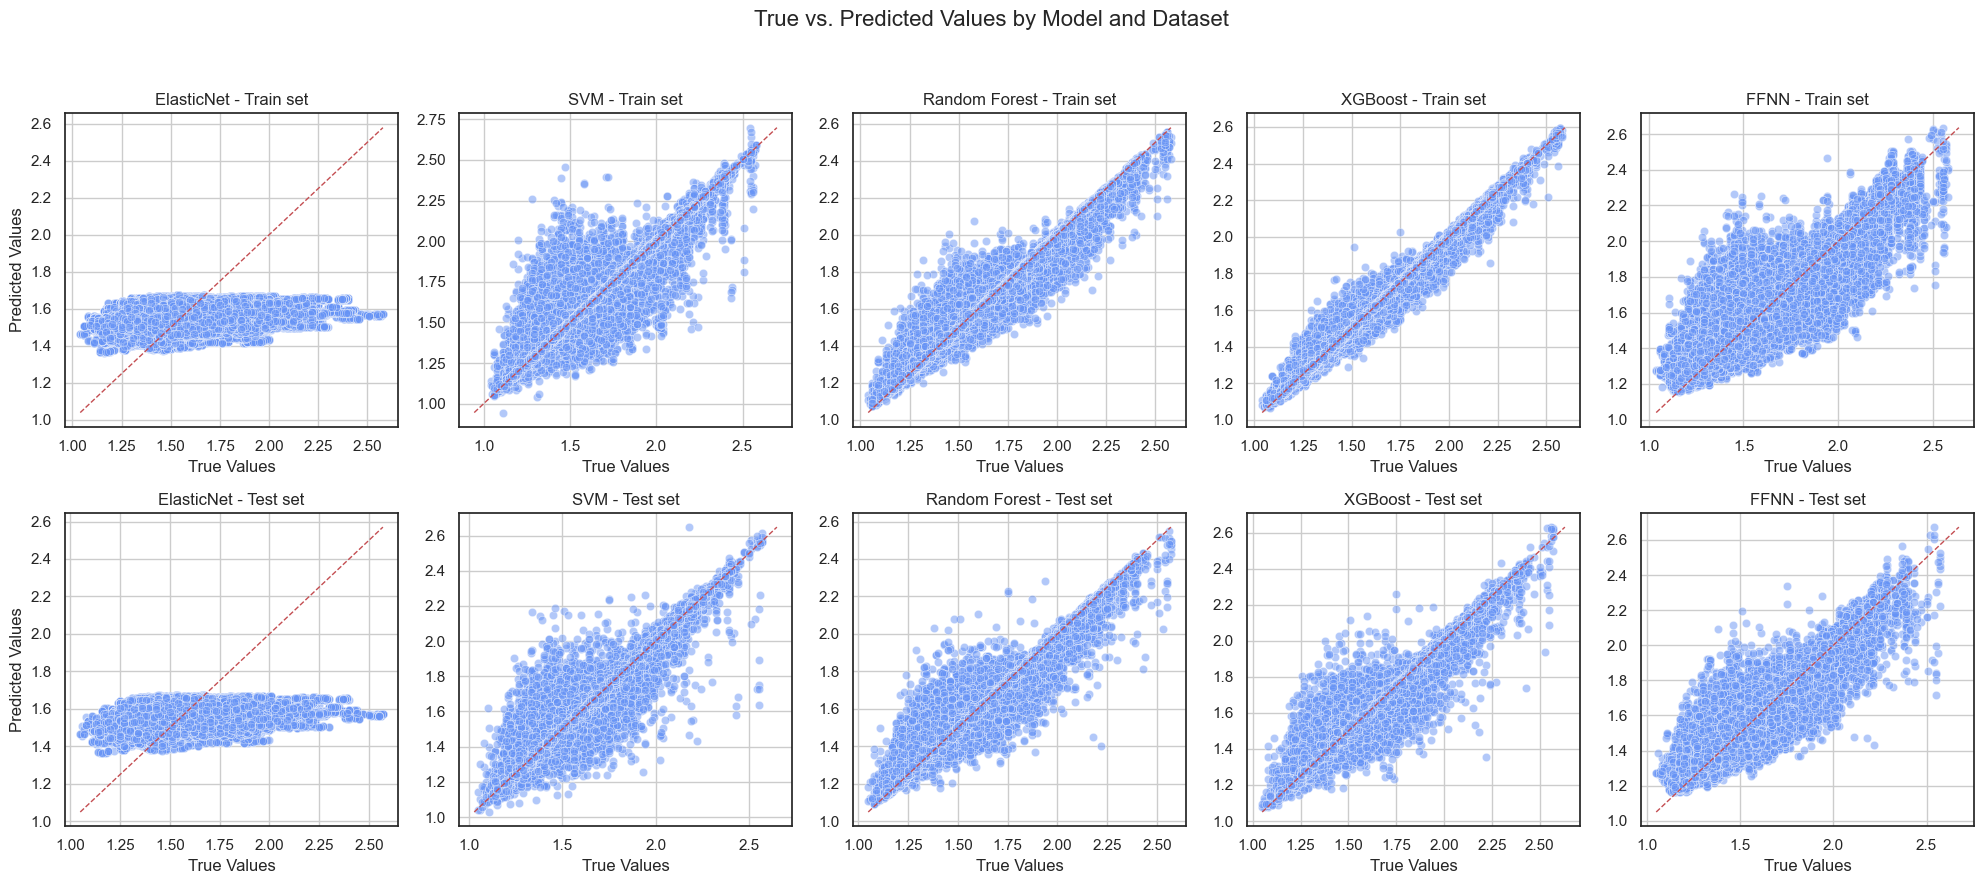

In [21]:
sns.set_theme(style="white")
n_models = len(models)

fig, axs = plt.subplots(2, n_models, figsize=(4 * n_models, 9), sharex=False, sharey=False)

for col, model in enumerate(models):
    for row, dataset in enumerate(["Train", "Test"]):
        y_true, y_pred = labels[model][dataset]
        y_true = np.ravel(y_true)
        y_pred = np.ravel(y_pred)

        ax = axs[row, col]
        sns.scatterplot(x=y_true, y=y_pred, alpha=0.5, color="#6693F5", ax=ax)

        # Diagonal line
        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        ax.plot([min_val, max_val], [min_val, max_val], "r--", lw=1)

        # Labels
        ax.set_xlabel("True Values")
        if col == 0:
            ax.set_ylabel("Predicted Values")
        else:
            ax.set_ylabel("")
        ax.set_title(f"{model} - {dataset} set")
        ax.grid(True)

plt.suptitle("True vs. Predicted Values by Model and Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

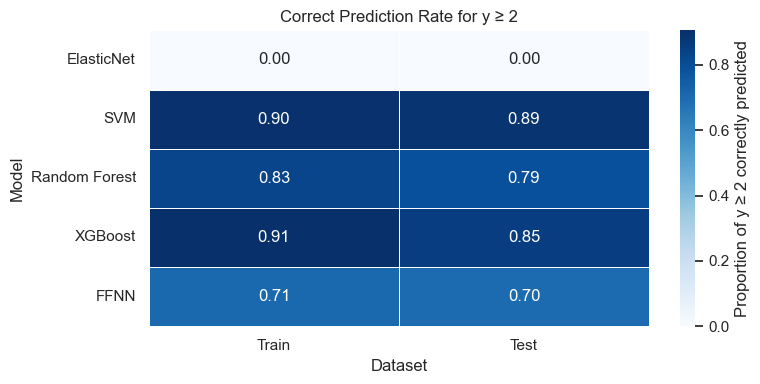

In [22]:
threshold = 2

# Compute heatmap data directly
heatmap_data = pd.DataFrame({
    model: {
        dataset: (
            np.sum(np.ravel(y_pred)[np.ravel(y_true) >= threshold] >= threshold) /
            np.sum(np.ravel(y_true) >= threshold)
        ) if np.sum(np.ravel(y_true) >= threshold) > 0 else np.nan
        for dataset, (y_true, y_pred) in sets.items()
    }
    for model, sets in labels.items()
}).T  # transpose so models are rows

# Reorder columns (optional)
heatmap_data = heatmap_data[['Train', 'Test']]

# Plot
plt.figure(figsize=(8, 4))
sns.set_theme(style="whitegrid")
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={'label': f'Proportion of y ≥ {threshold} correctly predicted'}
)
plt.title(f"Correct Prediction Rate for y ≥ {threshold}")
plt.xlabel("Dataset")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

**Model Interpretation**

In [23]:
models = ["ElasticNet", "SVM", "Random Forest", "XGBoost", "FFNN"]

file_shap = f"../results/linear_regression/test_shap.pkl"
with open(file_shap, "rb") as handle:
    explanation_linear_regression = pickle.load(handle)

file_shap = f"../results/svm/test_shap.pkl"
with open(file_shap, "rb") as handle:
    explanation_svm = pickle.load(handle)

file_shap = f"../results/random_forest/test_shap.pkl"
with open(file_shap, "rb") as handle:
    explanation_random_forest = pickle.load(handle)

file_shap = f"../results/xg_boost/test_shap.pkl"
with open(file_shap, "rb") as handle:
    explanation_xgboost = pickle.load(handle)

file_shap = f"../results/ffnn/test_shap.pkl"
with open(file_shap, "rb") as handle:
    explanation_ffnn = pickle.load(handle)

explanations = [
    explanation_linear_regression,
    explanation_svm,
    explanation_random_forest,
    explanation_xgboost,
    explanation_ffnn
]

In [24]:
# 1. Choose a reference model for sorting (e.g., XGBoost)
ref_explanation = explanation_xgboost

# 2. Compute mean absolute SHAP values per feature
mean_abs_shap = np.abs(ref_explanation.values).mean(axis=0)

# 3. Get the sorted indices and feature names
feature_order = np.argsort(mean_abs_shap)[::-1]
sorted_feature_names = [ref_explanation.feature_names[i] for i in feature_order]

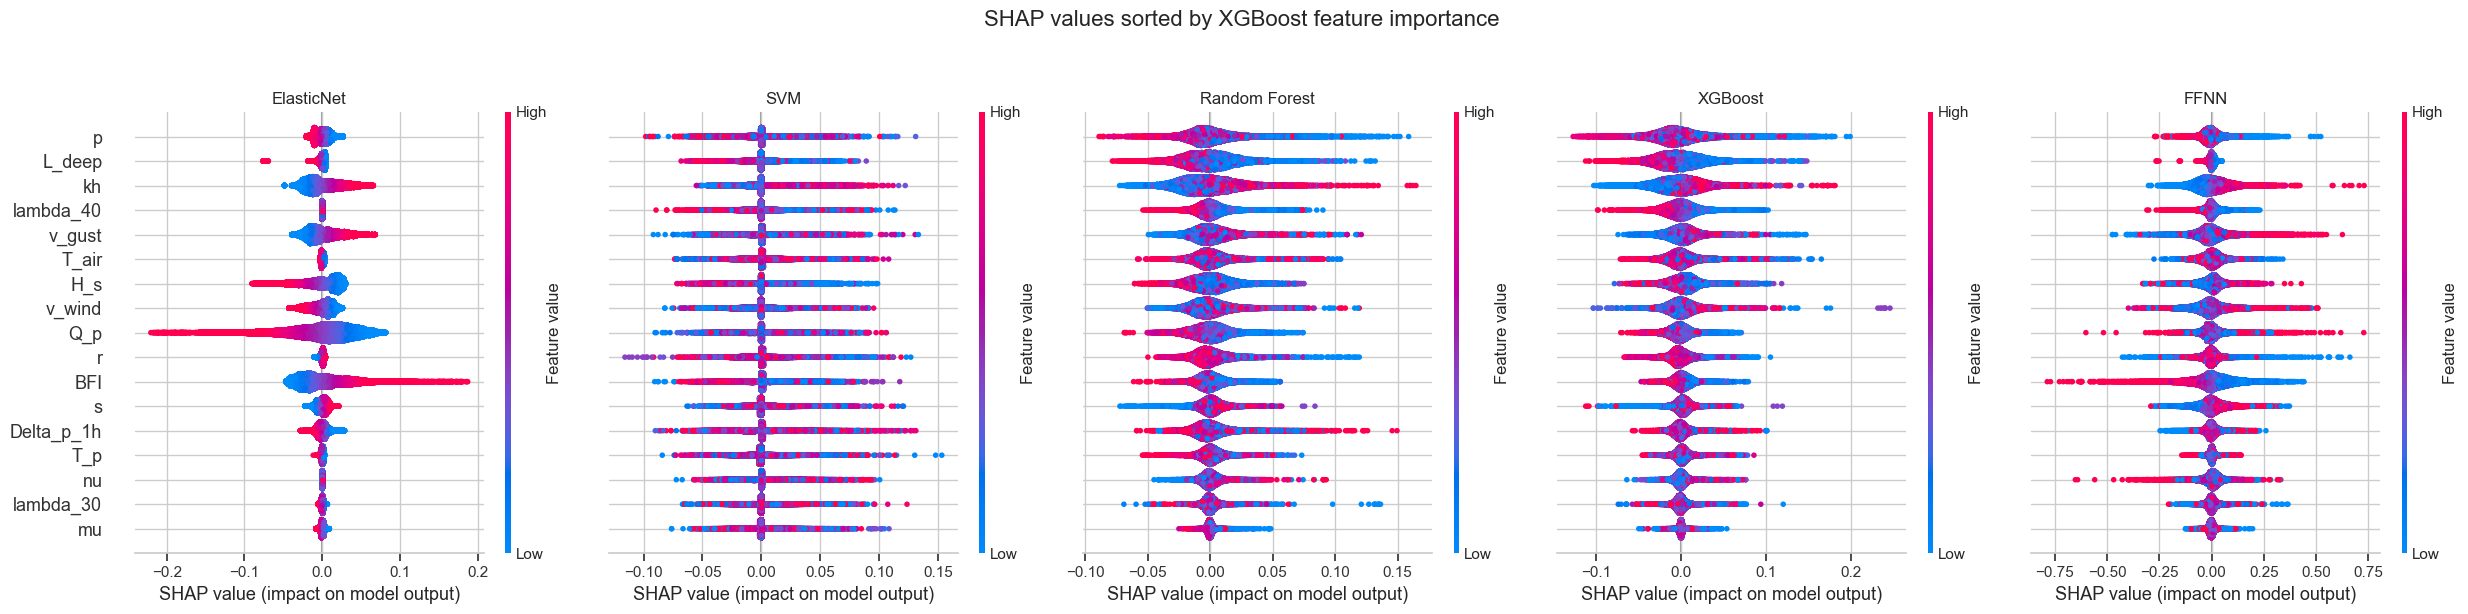

In [25]:
fig, axes = plt.subplots(1, len(explanations), figsize=(5 * len(explanations), 6), sharey=True)

for i, (expl, title) in enumerate(zip(explanations, models)):
    plt.sca(axes[i])
    shap.plots.beeswarm(expl, show=False, plot_size=None, order=feature_order, max_display=17)
    axes[i].set_title(title)

plt.suptitle("SHAP values sorted by XGBoost feature importance", fontsize=16, y=1.02)

plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

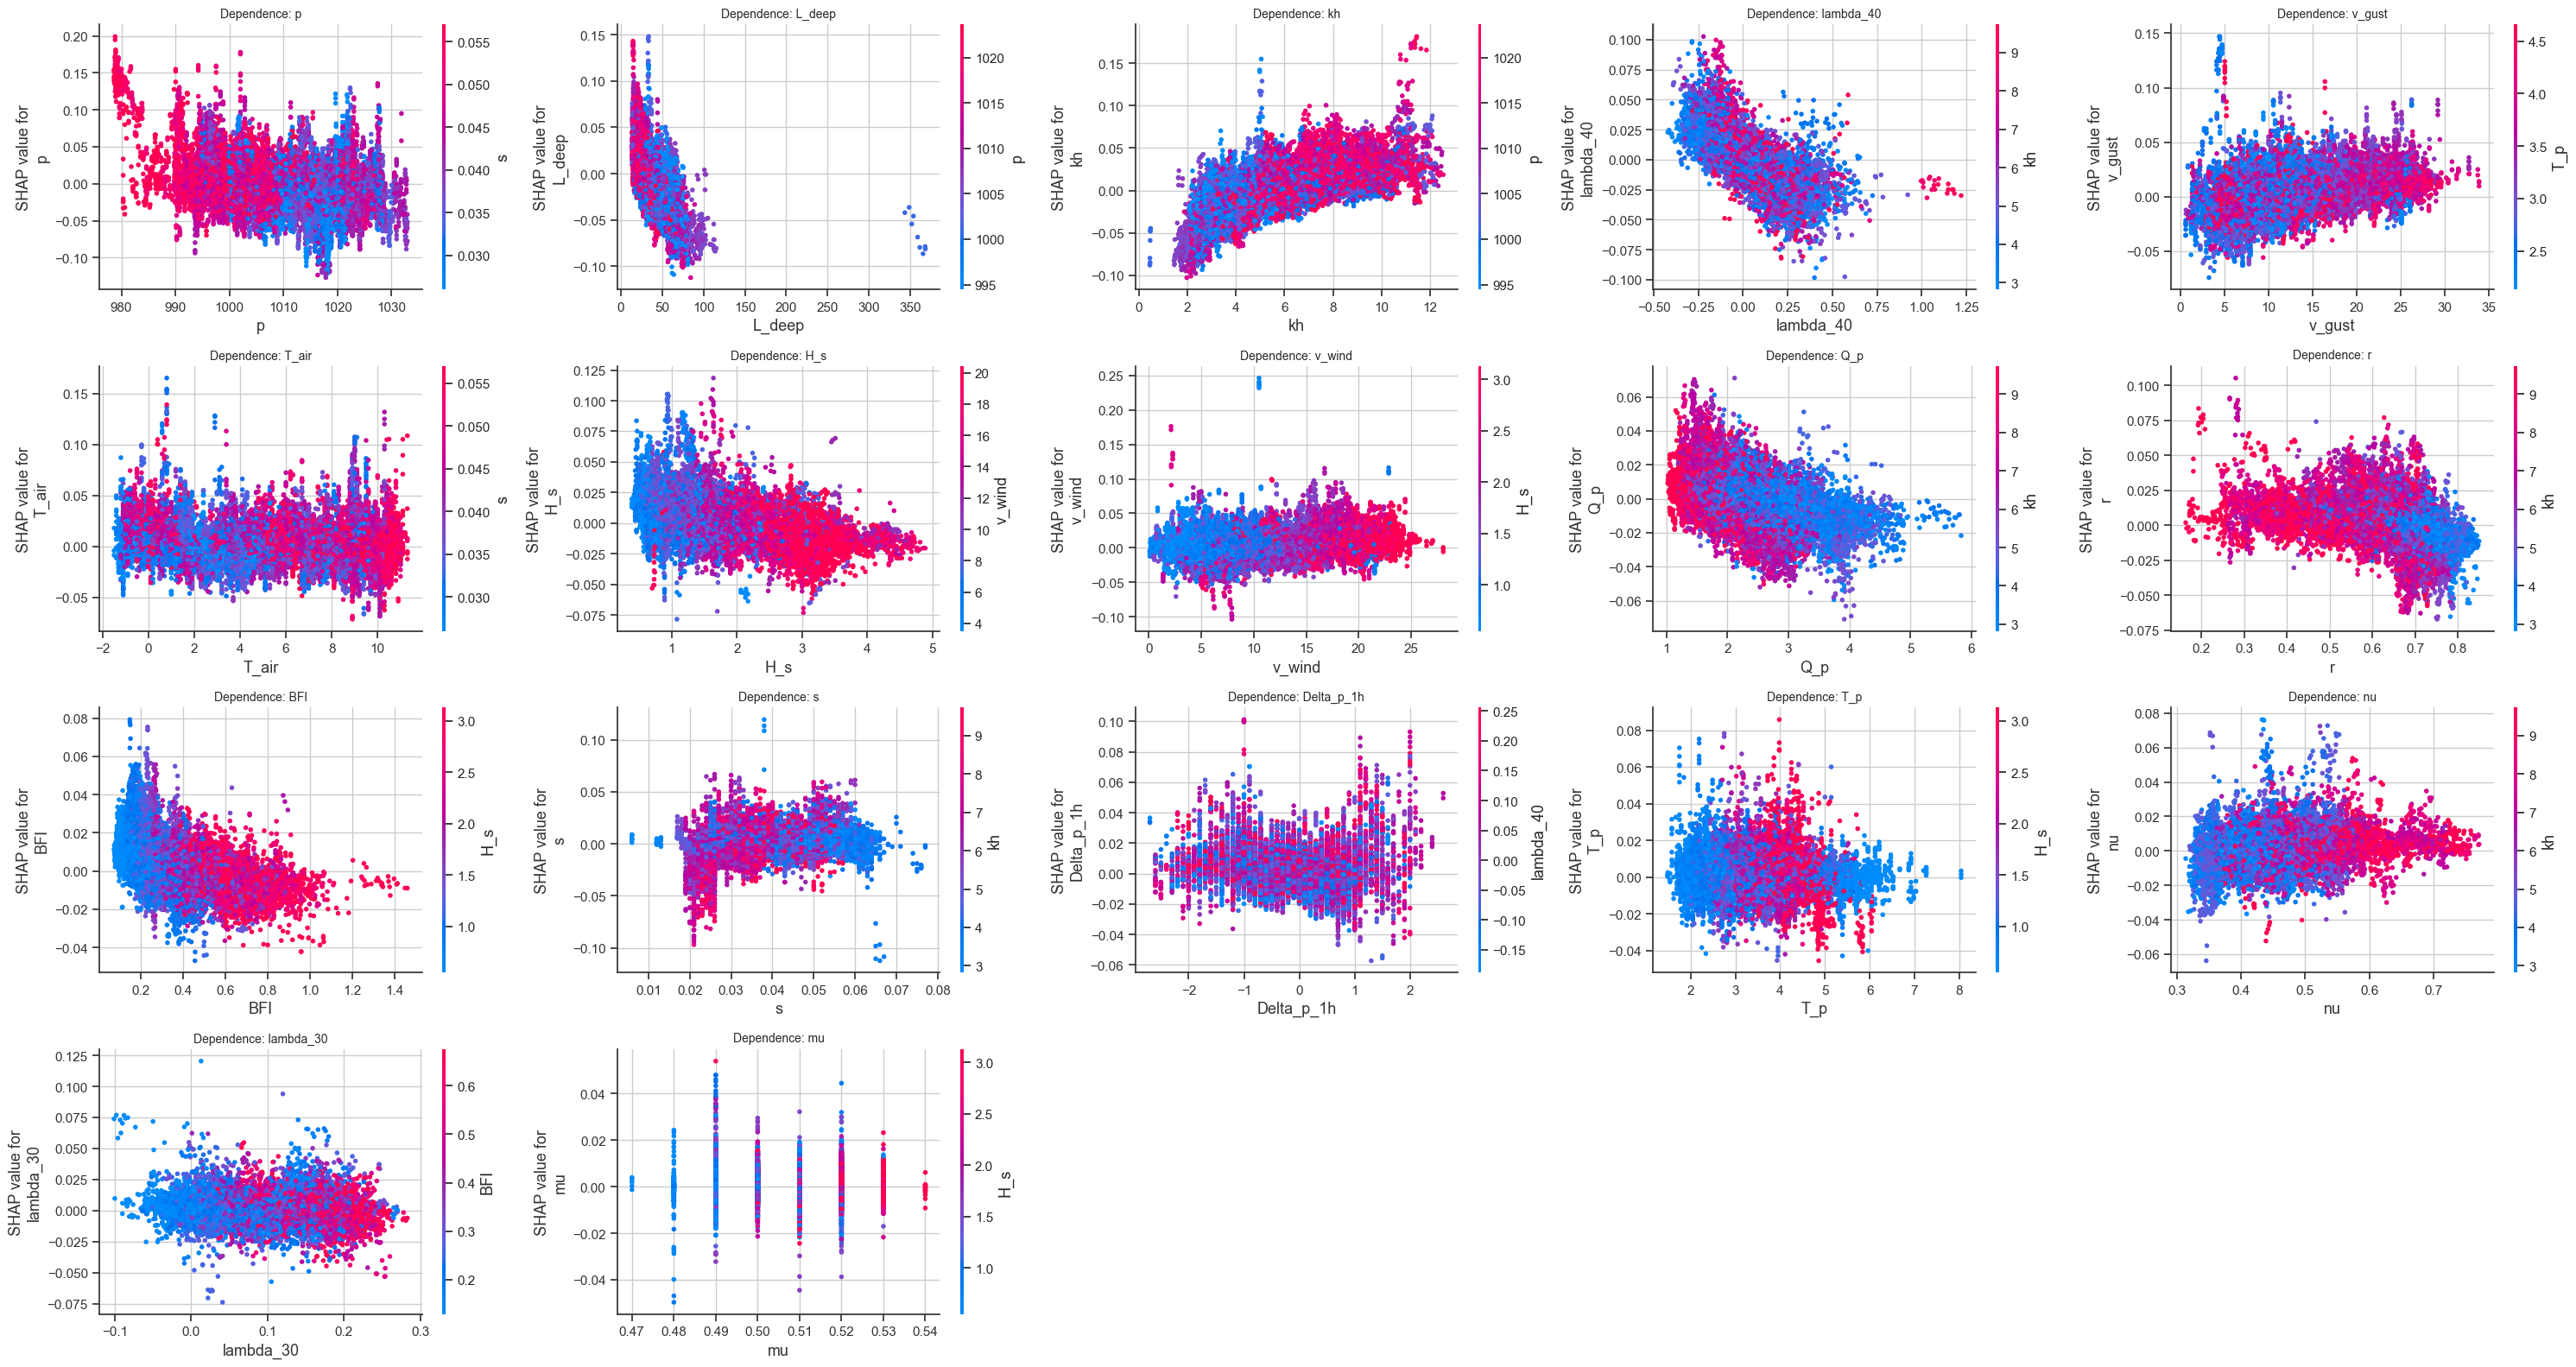

In [26]:
utils.plot_shap_dependence(explanation_xgboost, num_cols=5)